## **Problem 1**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from matplotlib.pyplot import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/Class 1 - EDA/Datasets/StateData.csv')
df.head(10)

,Population,Income,Illiteracy,LifeExp,Murder,HighSchoolGrad,Frost,Area,Longitude,Latitude,Name,Region
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,-86.7509,32.5901,Alabama,South
1,365,6315,1.5,69.31,11.3,66.7,152,566432,-127.2500,49.2500,Alaska,West
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,-111.6250,34.2192,Arizona,West
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,-92.2992,34.7336,Arkansas,South
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,-119.7730,36.5341,California,West
5,2541,4884,0.7,72.06,6.8,63.9,166,103766,-105.5130,38.6777,Colorado,West
6,3100,5348,1.1,72.48,3.1,56.0,139,4862,-72.3573,41.5928,Connecticut,Northeast
7,579,4809,0.9,70.06,6.2,54.6,103,1982,-74.9841,38.6777,Delaware,South
8,8277,4815,1.3,70.66,10.7,52.6,11,54090,-81.6850,27.8744,Florida,South
9,4931,4091,2.0,68.54,13.9,40.6,60,58073,-83.3736,32.3329,Georgia,South


In [ ]:
df.dtypes.value_counts()

,count
float64,6
int64,4
object,2


In [ ]:
df.shape

(50, 12)

In [ ]:
df.describe()

,Population,Income,Illiteracy,LifeExp,Murder,HighSchoolGrad,Frost,Area,Longitude,Latitude
count,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,4246.420000,4435.800000,1.170000,70.878600,7.37800,53.108000,104.460000,70735.880000,-92.464138,39.410740
std,4464.491433,614.469939,0.609533,1.342394,3.69154,8.076998,51.980848,85327.299622,16.180787,4.976349
min,365.000000,3098.000000,0.500000,67.960000,1.40000,37.800000,0.000000,1049.000000,-127.250000,27.874400
25%,1079.500000,3992.750000,0.625000,70.117500,4.35000,48.050000,66.250000,36985.250000,-104.159500,35.548150
50%,2838.500000,4519.000000,0.950000,70.675000,6.85000,53.250000,114.500000,54277.000000,-89.900300,39.620750
75%,4968.500000,4813.500000,1.575000,71.892500,10.67500,59.150000,139.750000,81162.500000,-78.977850,43.136100
max,21198.000000,6315.000000,2.800000,73.600000,15.10000,67.300000,188.000000,566432.000000,-68.980100,49.250000


In [ ]:
df.isnull().sum().sum()

0

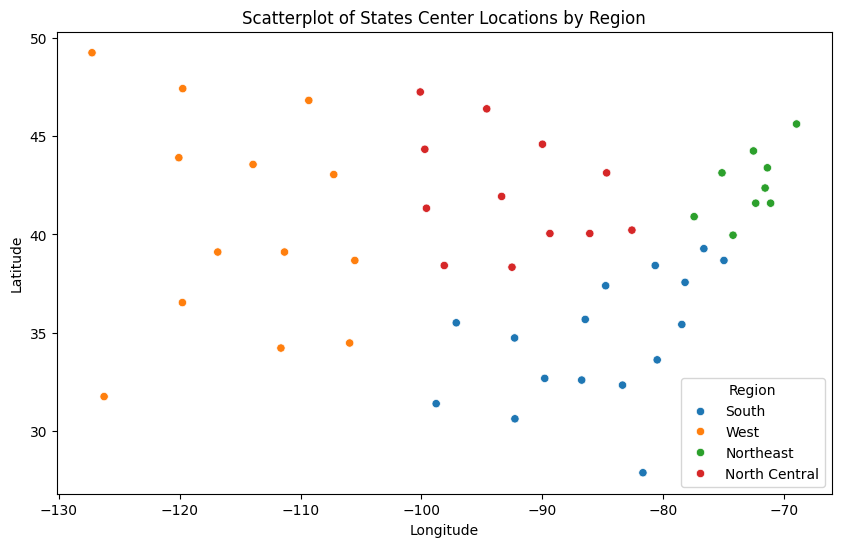

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Region', palette='tab10')


plt.title('Scatterplot of States Center Locations by Region')
plt.xlabel('Longitude')
plt.ylabel('Latitude')


plt.show()

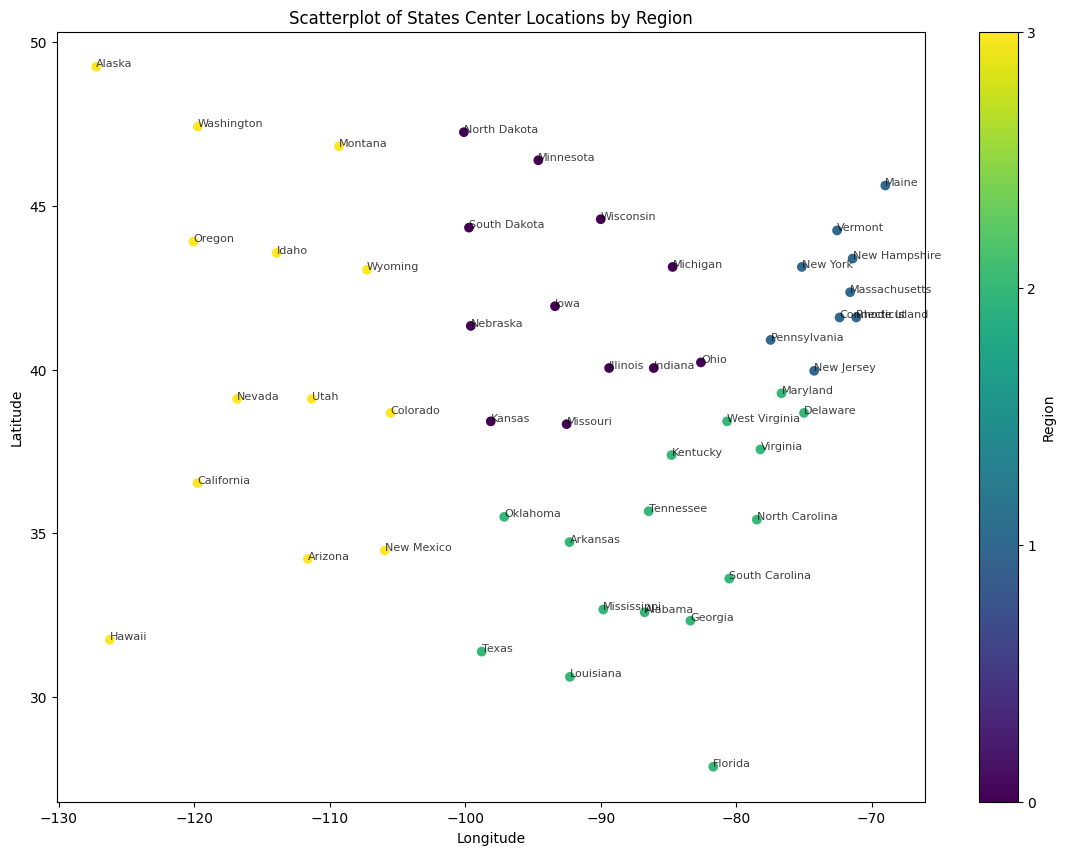

The most southern state based on the plot is: Florida


In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))
scatter = ax.scatter(df['Longitude'], df['Latitude'], c=df['Region'].astype('category').cat.codes, cmap='viridis')

# Add labels for each point
for i, txt in enumerate(df['Name']):
    ax.annotate(txt, (df['Longitude'][i], df['Latitude'][i]), fontsize=8, alpha=0.75)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatterplot of States Center Locations by Region')
plt.colorbar(scatter, ticks=[0, 1, 2, 3], label='Region')
plt.show()

# Find the most southern state by latitude
most_southern_state = df.loc[df['Latitude'].idxmin()]
print(f"The most southern state based on the plot is: {most_southern_state['Name']}")


In [ ]:
# Find the state with the least number of days below freezing
least_frost_state = df.loc[df['Frost'].idxmin()]
print(f"The state with the least number of days below freezing is: {least_frost_state['Name']} with {least_frost_state['Frost']} days")


The state with the least number of days below freezing is: Hawaii with 0 days


In [ ]:
# Region with the highest average high school graduation rate
region_high_school_grad = df.groupby('Region')['HighSchoolGrad'].mean()
highest_grad_region =  region_high_school_grad.idxmax()
highest_grad_rate = region_high_school_grad.max()
print(f"The region with the highest average high school graduation rate is: {highest_grad_region} with an average rate of {highest_grad_rate:.2f}%")

The region with the highest average high school graduation rate is: West with an average rate of 62.00%


In [ ]:
def weighted_avg(df, high_school_grad_col, population_col):
    return (df[high_school_grad_col] * df[population_col]).sum() / df[population_col].sum()

# Group by 'Region' and apply the weighted_avg function
weighted_avg_high_school_grad = df.groupby('Region').apply(lambda x: weighted_avg(x, 'HighSchoolGrad', 'Population')).reset_index()

# Rename the columns for better readability
weighted_avg_high_school_grad.columns = ['Region', 'WeightedAvgHighSchoolGrad']

print(weighted_avg_high_school_grad)

          Region  WeightedAvgHighSchoolGrad
0  North Central                  53.716965
1      Northeast                  53.006149
2          South                  44.952587
3           West                  62.211639


<Figure size 1000x600 with 0 Axes>

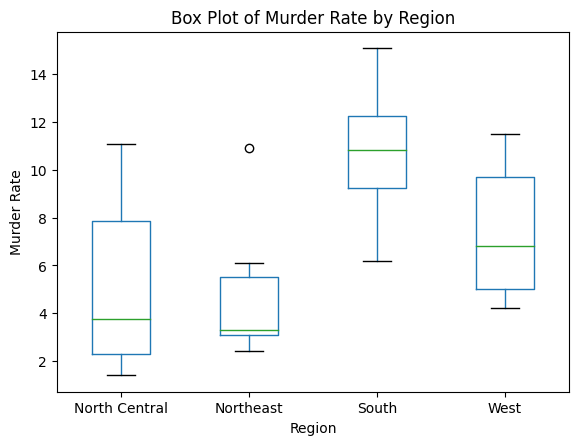

In [ ]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Murder', by='Region', grid=False)
plt.title('Box Plot of Murder Rate by Region')
plt.suptitle('')  # Bỏ tiêu đề phụ mặc định của Pandas
plt.xlabel('Region')
plt.ylabel('Murder Rate')
plt.show()

The region has the highest mdeian murder rate is South


The region has the largest range: North Central

In [ ]:
X = df[['Population', 'Income', 'Illiteracy', 'Murder', 'HighSchoolGrad', 'Frost', 'Area']]
Y = df['LifeExp']

In [ ]:
import statsmodels.api as sm
model = sm.OLS(Y, X)
results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                LifeExp   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              1641.
Date:                Sat, 03 Aug 2024   Prob (F-statistic):                    4.78e-50
Time:                        03:30:41   Log-Likelihood:                         -144.21
No. Observations:                  50   AIC:                                      302.4
Df Residuals:                      43   BIC:                                      315.8
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

A) The regression equation based on the coefficients provide:

LifeExp = 0.0001×Population+0.0035×Income+10.4142×Illiteracy+0.1796×Murder+0.6984×HighSchoolGrad+0.0639×Frost−0.00004041×Area

B) 0.0035
This means that for each additional unit increase in the income, the life expectancy increases by approximately 0.0035 years.


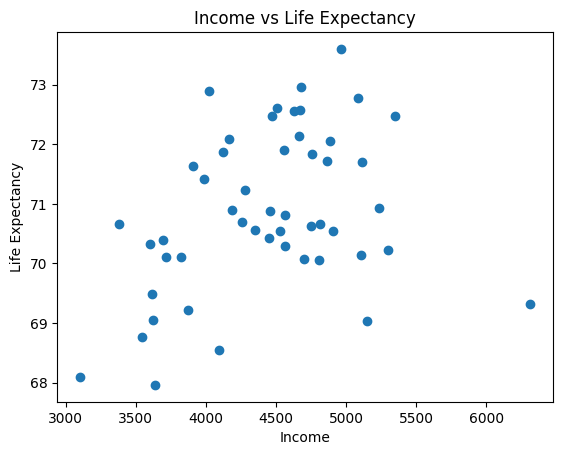

In [ ]:
plt.scatter(df['Income'], df['LifeExp'])
plt.xlabel('Income')
plt.ylabel('Life Expectancy')
plt.title('Income vs Life Expectancy')
plt.show()


C) Yes it does agree with the coefficient
This is because from the graph, I observe a general upward trend, as Income increases, Life Expectancy also tends to increase.


D) 0.1796

This means that for each additional unit increase in the murder rate, the life expectancy increases by approximately 0.1796 years.
But this might be weird, as one might expect higher murder rates to be associated with lower life expectancy.

In [ ]:
X = df[['Murder', 'HighSchoolGrad', 'Frost']]
# Chọn biến phụ thuộc
y = df['LifeExp']

In [ ]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                LifeExp   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     38.03
Date:                Sat, 03 Aug 2024   Prob (F-statistic):           1.63e-12
Time:                        06:32:23   Log-Likelihood:                -53.987
No. Observations:                  50   AIC:                             116.0
Df Residuals:                      46   BIC:                             123.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             71.0364      0.983     72.

A) The coefficient of the Frost is -0.0069, so there is the negative correlation, so for each additional unit increase in the number of days below freezing, the average life expectancy decreases by approximately 0.0069 years.

In [ ]:
frost_range = df['Frost'].max() - df['Frost'].min()
print(f"Range of Frost: {frost_range}")

Range of Frost: 188


In [ ]:
frost_coef = model.params['Frost']
life_exp_change = frost_range * frost_coef
print(f"Years of LifeExp change: {life_exp_change}")

Years of LifeExp change: -1.299406108950281


# **Problem 2**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML/Class 1 - EDA/Datasets/SpeciesData.csv')
data.head(10)

,Elevation,Aspect,Slope,HdistWater,VdistWater,HdistRoad,Shade9,Shade12,Shade3,HdistFire,...,Soil32,Soil33,Soil34,Soil35,Soil36,Soil37,Soil38,Soil39,Soil40,Target
0,2926,245,4,30,7,5180,212,243,169,3331,...,0,0,0,0,0,0,0,0,0,1
1,3172,162,3,180,7,3632,222,240,153,4624,...,0,0,0,0,0,0,0,0,0,1
2,3021,53,7,258,-12,3544,224,224,134,5720,...,0,0,0,0,0,0,0,0,0,1
3,3113,14,13,376,23,3684,207,213,141,4380,...,0,0,0,0,0,0,0,0,0,1
4,2948,79,15,120,24,5493,239,211,99,1608,...,0,0,0,0,0,0,0,0,0,1
5,3024,331,6,30,3,3194,206,233,165,300,...,0,0,0,0,0,0,0,0,0,1
6,3145,63,13,362,16,2200,231,214,113,2396,...,0,0,0,0,0,0,0,0,0,1
7,2877,45,12,234,35,2377,223,213,122,1205,...,0,0,0,0,0,0,0,0,0,1
8,2970,71,17,268,42,488,237,204,92,853,...,0,0,0,0,0,0,0,0,0,1
9,3244,54,11,150,-1,2960,226,217,123,1907,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data.dtypes.value_counts()

,count
int64,55


In [ ]:
# Sum int columns

In [ ]:
data.shape

(11684, 55)

In [ ]:
data.describe()

,Elevation,Aspect,Slope,HdistWater,VdistWater,HdistRoad,Shade9,Shade12,Shade3,HdistFire,...,Soil32,Soil33,Soil34,Soil35,Soil36,Soil37,Soil38,Soil39,Soil40,Target
count,11684.000000,11684.000000,11684.000000,11684.000000,11684.000000,11684.000000,11684.000000,11684.000000,11684.000000,11684.000000,...,11684.000000,11684.000000,11684.000000,11684.000000,11684.000000,11684.000000,11684.000000,11684.000000,11684.000000,11684.000000
mean,2954.482968,155.988617,14.184012,267.873759,47.043906,2342.993410,211.913814,223.016090,142.445738,1961.488275,...,0.090551,0.079083,0.002824,0.003595,0.000257,0.000342,0.028073,0.022595,0.014207,0.367768
std,280.094696,112.071690,7.546939,212.349787,58.463440,1558.071188,27.386981,19.892962,38.698755,1313.638661,...,0.286982,0.269879,0.053072,0.059850,0.016022,0.018500,0.165187,0.148615,0.118350,0.482218
min,1879.000000,0.000000,0.000000,0.000000,-159.000000,0.000000,53.000000,93.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2801.000000,59.000000,9.000000,95.000000,7.000000,1100.750000,198.000000,213.000000,119.000000,1015.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2991.000000,126.000000,13.000000,228.000000,30.000000,1976.000000,218.000000,226.000000,143.000000,1683.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3159.000000,262.000000,19.000000,384.000000,70.000000,3326.250000,231.000000,237.000000,169.000000,2524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3830.000000,359.000000,53.000000,1361.000000,589.000000,7116.000000,254.000000,254.000000,253.000000,7050.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.isnull().sum().sum()

0

1)

In [ ]:
X = data.drop(columns=['Target'])
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lambda_values = np.logspace(-4, 4, 10)

In [ ]:
l1_auc_scores = []
l2_auc_scores = []

In [ ]:
param_grid = {'C': 1 / lambda_values}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000)
grid_search_l1 = GridSearchCV(model_l1, param_grid, cv=10, scoring='roc_auc')
grid_search_l1.fit(X_train_scaled, y_train)
l1_best_auc = grid_search_l1.best_score_

In [ ]:
# best params: C?
L1FINAL = LogisticRegression(penalty='l1',C=.......................)
L1FINAL.fit(X_train,y_train)

In [ ]:
y_pred = L1FINAL.predict(X_test_scaled)

NameError: name 'L1FINAL' is not defined

In [ ]:
f1_score(y_pred, y_test)

In [ ]:
#Confusion matrix

In [ ]:
model_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=10000)
grid_search_l2 = GridSearchCV(model_l2, param_grid, cv=10, scoring='roc_auc')
grid_search_l2.fit(X_train_scaled, y_train)
l2_best_auc = grid_search_l2.best_score_

In [ ]:
print(f"Best AUC for L1-regularization: {l1_best_auc}")
print(f"Best AUC for L2-regularization: {l2_best_auc}")

Best AUC for L1-regularization: 0.8331535792840141
Best AUC for L2-regularization: 0.8329153118718334


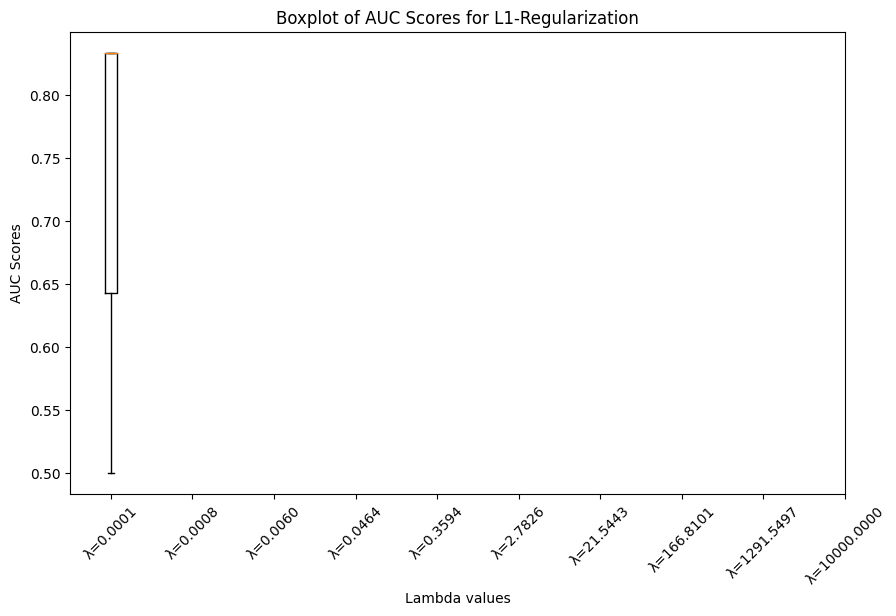

In [ ]:
# Sau khi chạy GridSearchCV
l1_auc_scores = grid_search_l1.cv_results_['mean_test_score']

# Bây giờ bạn có thể tạo boxplot từ danh sách này
plt.figure(figsize=(10, 6))
plt.boxplot([l1_auc_scores])
plt.title('Boxplot of AUC Scores for L1-Regularization')
plt.xlabel('Lambda values')
plt.ylabel('AUC Scores')
plt.xticks(ticks=range(1, len(lambda_values) + 1), labels=[f'λ={val:.4f}' for val in lambda_values], rotation=45)
plt.show()


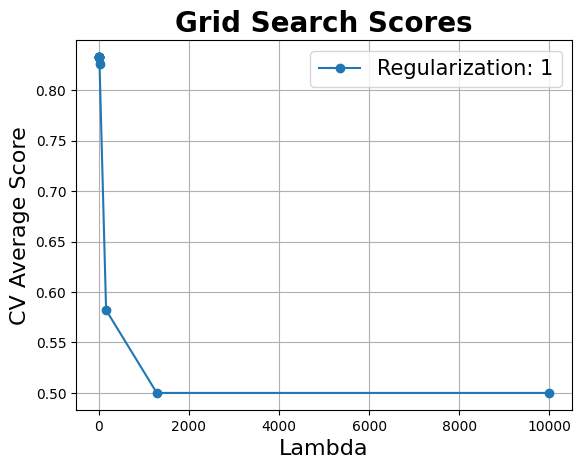

In [ ]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

# Calling Method
plot_grid_search(grid_search_l1.cv_results_, lambda_values, [1], 'Lambda', 'Regularization')

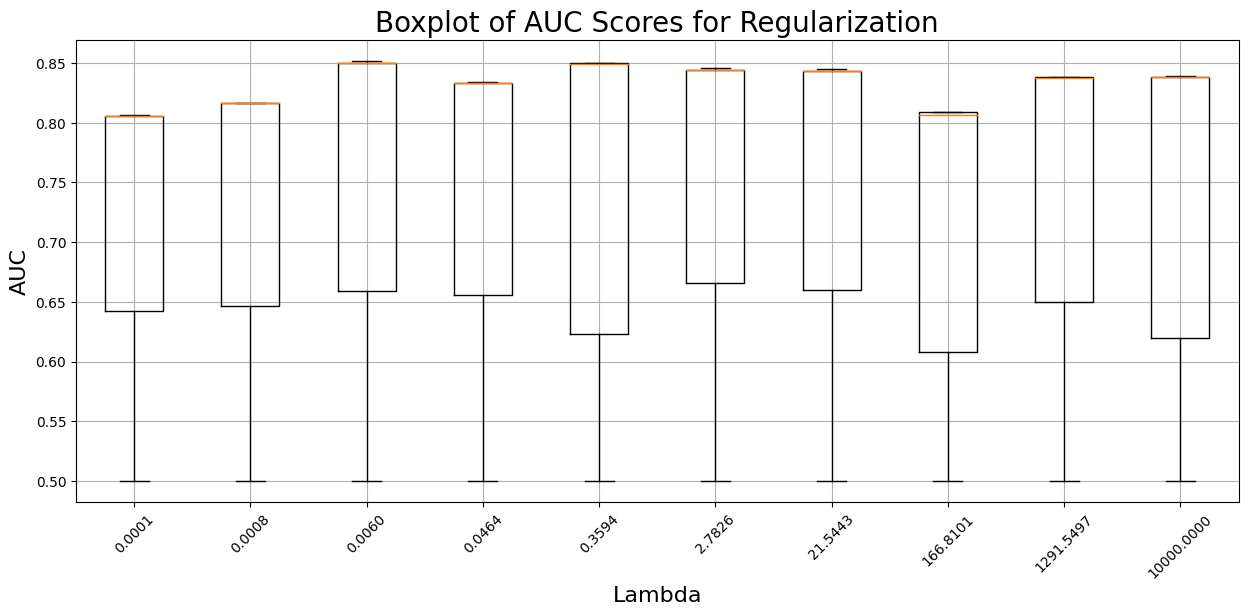

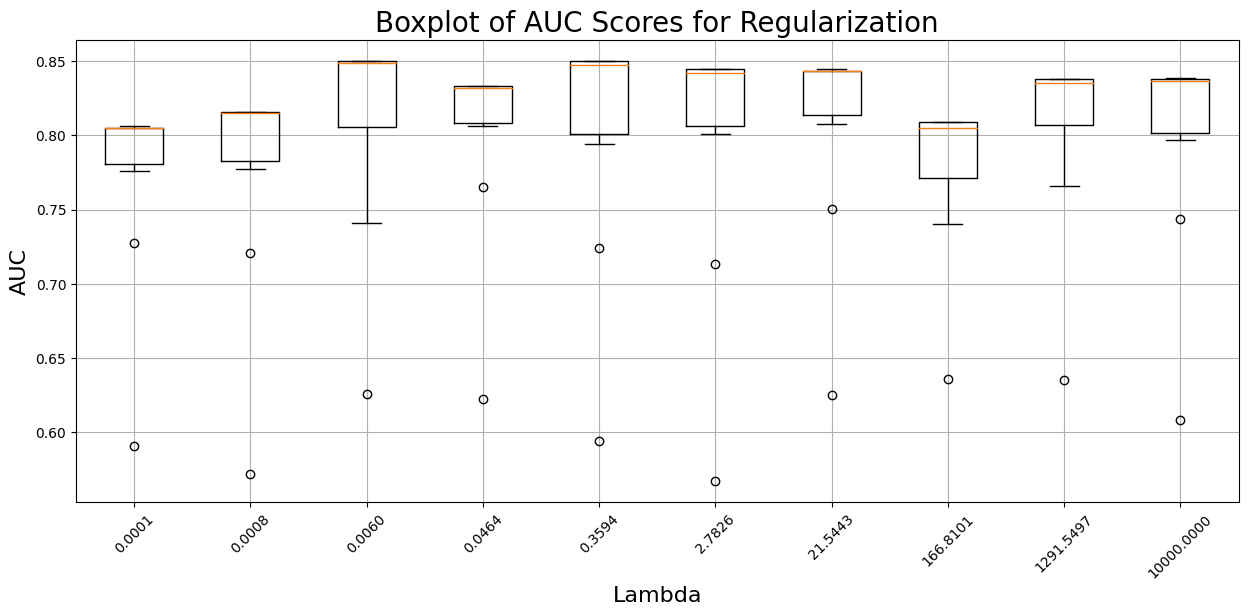

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_grid_search_box(cv_results, grid_param_1, name_param_1, n_splits=10):
    # Extract the test scores for each fold
    scores = cv_results['split0_test_score']  # start with the scores from the first fold
    for i in range(1, n_splits):  # iterate over the splits
        fold_scores = cv_results[f'split{i}_test_score']
        scores = np.vstack([scores, fold_scores])  # stack scores across folds

    scores = scores.T  # transpose so that each row corresponds to a lambda value

    # Plot the boxplot
    plt.figure(figsize=(15, 6))
    plt.boxplot(scores, labels=[f'{val:.4f}' for val in grid_param_1])
    plt.xlabel(name_param_1, fontsize=16)
    plt.ylabel('AUC', fontsize=16)
    plt.title('Boxplot of AUC Scores for Regularization', fontsize=20)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Example for L1-Regularization
plot_grid_search_box(grid_search_l1.cv_results_, lambda_values, 'Lambda')

# Example for L2-Regularization
plot_grid_search_box(grid_search_l2.cv_results_, lambda_values, 'Lambda')


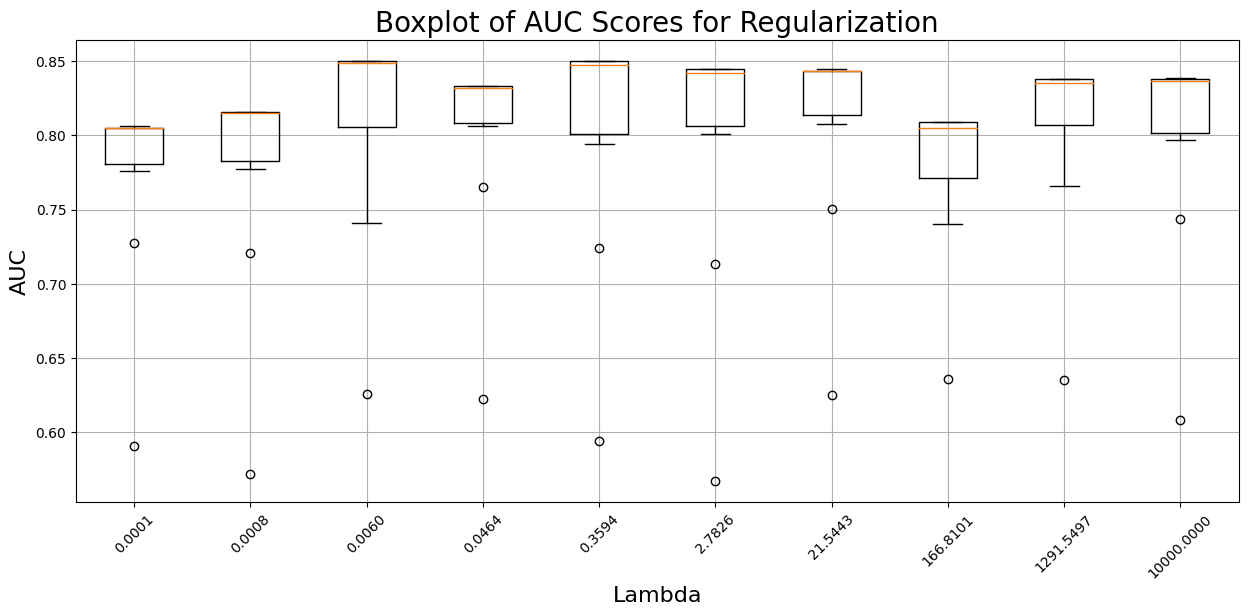

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_single_boxplot(cv_results, grid_param_1, name_param_1, n_splits=10):
    # Extract the test scores for each fold
    scores = cv_results['split0_test_score']  # start with the scores from the first fold
    for i in range(1, n_splits):  # iterate over the splits
        fold_scores = cv_results[f'split{i}_test_score']
        scores = np.vstack([scores, fold_scores])  # stack scores across folds

    scores = scores.T  # transpose so that each row corresponds to a lambda value

    # Plot the boxplot
    plt.figure(figsize=(15, 6))
    plt.boxplot(scores, labels=[f'{val:.4f}' for val in grid_param_1])
    plt.xlabel(name_param_1, fontsize=16)
    plt.ylabel('AUC', fontsize=16)
    plt.title('Boxplot of AUC Scores for Regularization', fontsize=20)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Plot for L2-Regularization (assuming this is the one you liked)
plot_single_boxplot(grid_search_l2.cv_results_, lambda_values, 'Lambda')


In [ ]:
# For L1 Regularization
scores_l1 = []
for i in range(10):  # Assuming 10 lambda values
    scores_l1.append(grid_search_l1.cv_results_[f'split{i}_test_score'])

# For L2 Regularization
scores_l2 = []
for i in range(10):  # Assuming 10 lambda values
    scores_l2.append(grid_search_l2.cv_results_[f'split{i}_test_score'])

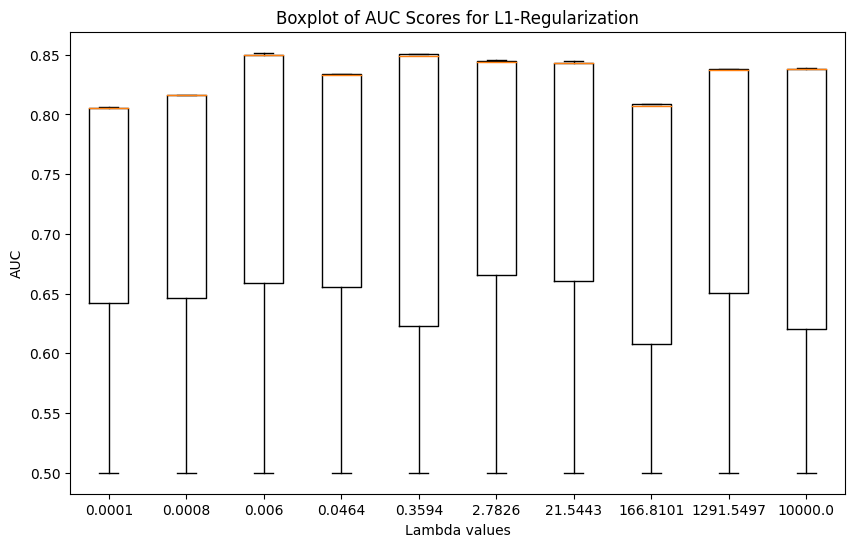

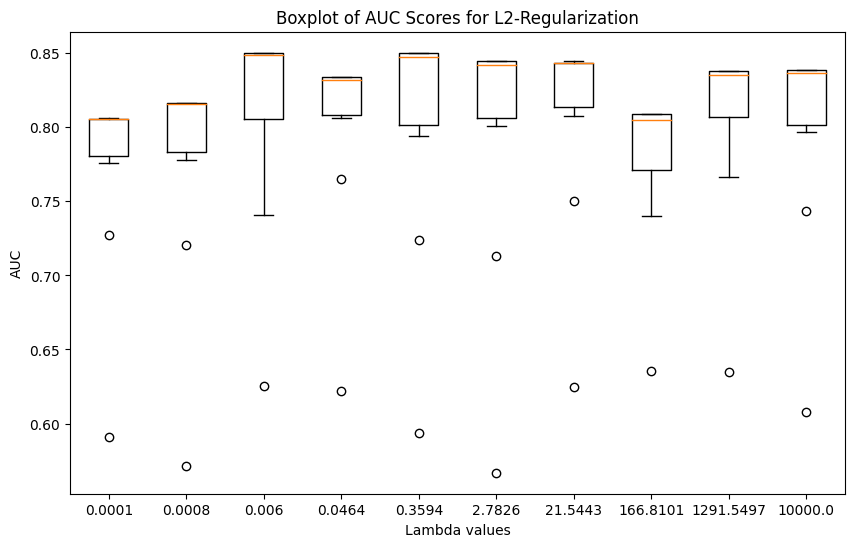

In [ ]:
# Plotting for L1 Regularization
plt.figure(figsize=(10, 6))
plt.boxplot(scores_l1, labels=np.round(grid_search_l1.param_grid['C'][::-1], 4))
plt.title('Boxplot of AUC Scores for L1-Regularization')
plt.xlabel('Lambda values')
plt.ylabel('AUC')
plt.show()

# Plotting for L2 Regularization
plt.figure(figsize=(10, 6))
plt.boxplot(scores_l2, labels=np.round(grid_search_l2.param_grid['C'][::-1], 4))
plt.title('Boxplot of AUC Scores for L2-Regularization')
plt.xlabel('Lambda values')
plt.ylabel('AUC')
plt.show()


In [ ]:
scores_l1 = np.array(scores_l1)
scores_l2 = np.array(scores_l2)

# Calculate the median AUC scores for each lambda value
median_l1 = np.median(scores_l1, axis=1)  # axis=1 for median across the cross-validation folds
median_l2 = np.median(scores_l2, axis=1)

# Print the results
print("Median AUC Scores for L1-Regularization:")
print(median_l1)

print("Median AUC Scores for L2-Regularization:")
print(median_l2)


Median AUC Scores for L1-Regularization:
[0.80531853 0.81620978 0.85009653 0.83322072 0.84909588 0.8441731
 0.84342986 0.80682111 0.83750855 0.83829302]
Median AUC Scores for L2-Regularization:
[0.80525418 0.81539575 0.84869691 0.83173745 0.84743243 0.84212355
 0.84347169 0.80482625 0.83535853 0.83692424]


=> from the results and graphs above, i will take 2.78.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Target'],axis=1),data.Target, test_size=0.3, random_state=21)
# Train with L1 regularization
L1FINAL = LogisticRegression(penalty='l1', solver='liblinear', C=2.78, max_iter=10000)
L1FINAL.fit(X_train, y_train)

# Train with L2 regularization
L2FINAL = LogisticRegression(penalty='l2', solver='lbfgs', C=2.78, max_iter=10000)
L2FINAL.fit(X_train, y_train)

LogisticRegression(C=2.78, max_iter=10000)

In [ ]:
L1preds = L1FINAL.predict_proba(X_test).T[1]
fprL1, tprL1, threshL1 = roc_curve(y_test, L1preds)
roc_auc_L1= roc_auc_score(y_test, L1preds)

L2preds = L2FINAL.predict_proba(X_test).T[1]
fprL2, tprL2, threshL2 = roc_curve(y_test, L2preds)
roc_auc_L2= roc_auc_score(y_test, L2preds)

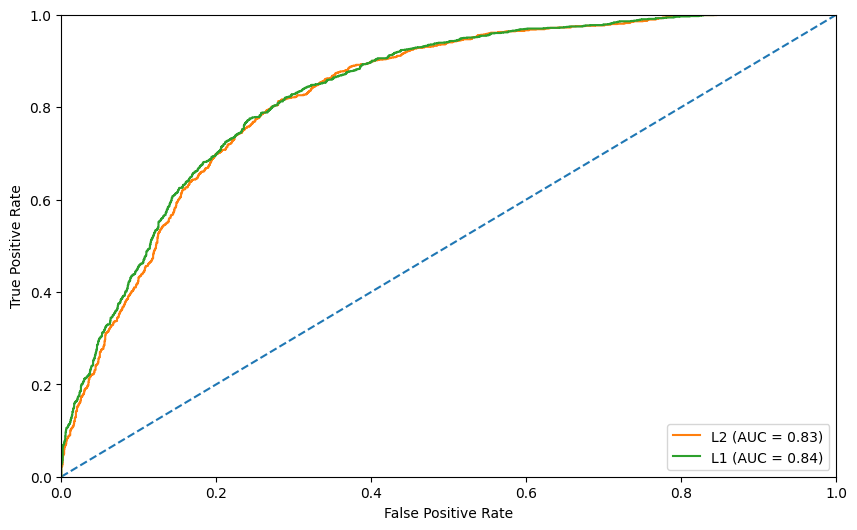

In [ ]:
#Plot the ROC curves
fig = figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fprL2, tprL2, label='L2 (AUC = %0.2f)' % roc_auc_L2)
plt.plot(fprL1, tprL1, label='L1 (AUC = %0.2f)' % roc_auc_L1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right');
plt.show()

In [ ]:
# Find the threshold for TPR >= 0.85
index_l1 = next(i for i, x in enumerate(tprL1) if x >= 0.85)
index_l2 = next(i for i, x in enumerate(tprL2) if x >= 0.85)

threshold_l1 = threshL1[index_l1]
threshold_l2 = threshL2[index_l2]

fpr_at_threshold_l1 = fprL1[index_l1]
fpr_at_threshold_l2 = fprL2[index_l2]

# Output the results
print(f"L1 Model - Threshold: {threshold_l1}, FPR: {fpr_at_threshold_l1}")
print(f"L2 Model - Threshold: {threshold_l2}, FPR: {fpr_at_threshold_l2}")

L1 Model - Threshold: 0.3213096864707846, FPR: 0.33148916551406177
L2 Model - Threshold: 0.3167245182406378, FPR: 0.33241124942369754
